In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [63]:
dataset = pd.read_excel("dataset.xlsx")
dataset.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58
0,0,64,64,0,32,0,0,0,0,0,...,0,0,0,778,0,0,3756,61,278,1
1,21,28,5,0,14,28,21,7,0,94,...,0,132,0,372,18,48,5114,101,1028,1
2,6,0,71,0,123,19,19,12,64,25,...,1,143,0,276,184,1,9821,485,2259,1
3,0,0,0,0,63,0,31,63,31,63,...,0,137,0,137,0,0,3537,40,191,1
4,0,0,0,0,63,0,31,63,31,63,...,0,135,0,135,0,0,3537,40,191,1


In [67]:
dataset.isnull().sum().head(10)

Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
dtype: int64

In [3]:
#Use random half of the dataset for training and other half for validation by preserving the distribution of the classes 
#in the original dataset. 
X = dataset.drop("Column58",axis=1)
y = dataset["Column58"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [4]:
#The number of features in the reduced subset will be optimized on validation set.

#Do not optimize nearest neighbor parameter or distance metric of k-NN. 

#For all the following cases, always use 5 nearest neighbor (k = 5) and Euclidean distance to implement k-NN classifier.


In [5]:
#1) Feed the original dataset without any dimensionality reduction as input to k-NN.

#2) Feature extraction: Use PCA to reduce dimensionality to m, followed by k-NN. 
#Try for different values of m corresponding to proportion of variance of 0.80, 0.81, 0.82, ...., 0.99. Plot the data for m=2.

#3) Feature Selection: Use forward selection to reduce dimensionality to m using k-NN as predictor.
#Train the model for each m between 1 and 57. Also plot the data for m=2.


In [6]:
#1 feed the original dataset as input to knn with k = 5

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X,y)

y_knn_pred = knn.predict(X)

knn.score(X,y)
print(f"Accuracy of KNN on X , y:", knn.score(X, y))
print(f"Presion score of KNN on X, y:", precision_score(y,y_knn_pred))
print(f"Recall score of KNN on X, y:", recall_score(y,y_knn_pred))

Accuracy of KNN on X , y: 0.9148011301890894
Presion score of KNN on X, y: 0.9104563835932987
Recall score of KNN on X, y: 0.8692774407060121


In [8]:
#2) Feature extraction: Use PCA to reduce dimensionality to m, followed by k-NN.

In [9]:
#PCA is effected by scale so you need to scale the features in your data before applying PCA. 
#Use StandardScaler to help you standardize the dataset’s features onto unit scale

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [10]:
#The original data has 57 columns in X. 
#In this section, the code projects the original data which is 57 dimensional into m dimensions. 
#I should note that after dimensionality reduction, 
#there usually isn’t a particular meaning assigned to each principal component. 
#The new components are just the m main dimensions of variation.

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf_m2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf_m2

,principal component 1,principal component 2
0,-0.740387,0.128111
1,-1.060651,2.084818
2,-1.345786,5.443338
3,-0.812192,0.687689
4,-0.813023,0.686960
...,...,...
4596,-0.493258,-0.706649
4597,-0.446034,-1.443265
4598,-0.126051,-1.226103
4599,-0.615539,-0.618288


In [11]:
finalDf_m2 = pd.concat([principalDf_m2, dataset[["Column58"]]], axis = 1)
finalDf_m2

,principal component 1,principal component 2,Column58
0,-0.740387,0.128111,1
1,-1.060651,2.084818,1
2,-1.345786,5.443338,1
3,-0.812192,0.687689,1
4,-0.813023,0.686960,1
...,...,...,...
4596,-0.493258,-0.706649,0
4597,-0.446034,-1.443265,0
4598,-0.126051,-1.226103,0
4599,-0.615539,-0.618288,0


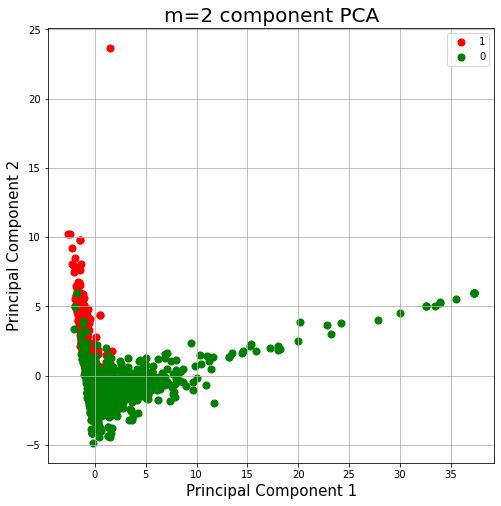

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title("m=2 component PCA", fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_m2["Column58"] == target
    ax.scatter(finalDf_m2.loc[indicesToKeep, 'principal component 1']
               , finalDf_m2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [13]:
#The explained variance tells you how much information (variance) can be attributed to each of the principal components. 
#This is important as while you can convert 57 dimensional space to 2 dimensional space, 
#you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_

pca.explained_variance_ratio_

#you can see that the first principal component contains 12.35% of the variance 
#the second principal component contains 5.64% of the variance. 
#Together, the two components contain 19.99% of the information.

array([0.12351488, 0.05647538])

In [14]:
expected_variances = pd.DataFrame([.80, .81, .82, .83, .84, .85, .86, .87, .88, .89, .90, .91, .92, .93, 
                                   .94, .95, .96, .97, .98, .99])
mvalues = pd.DataFrame()
float(expected_variances.iloc[1])


0.81

In [15]:
# Make an instance of the Model
for i in range(len(expected_variances)):
    pca = PCA(float(expected_variances.iloc[i]))
#Fit PCA on the set. Note: you are fitting PCA on the training set only.
    pca.fit(X)
    mvalues.at[i, "m"] = pca.n_components_
expected_variances_m = mvalues["m"]

In [68]:
expected_variances_m.index = [.80, .81, .82, .83, .84, .85, .86, .87, .88, .89, .90, .91, .92, .93, .94, .95, .96, .97, .98, .99]
expected_variances_m

0.80    35.0
0.81    35.0
0.82    36.0
0.83    37.0
0.84    38.0
0.85    39.0
0.86    39.0
0.87    40.0
0.88    41.0
0.89    42.0
0.90    43.0
0.91    44.0
0.92    45.0
0.93    46.0
0.94    47.0
0.95    48.0
0.96    49.0
0.97    50.0
0.98    52.0
0.99    54.0
Name: m, dtype: float64

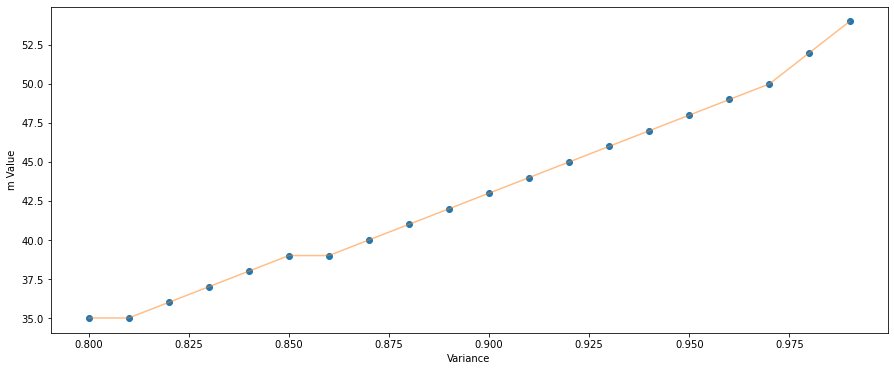

In [17]:
# plot the variance m relation
plt.figure(figsize = (15 ,6))
plt.plot(expected_variances_m , 'o')
plt.plot(expected_variances_m , '-' , alpha = 0.5)
plt.xlabel("Variance") , plt.ylabel('m Value')
plt.show()

In [18]:
X_knn = finalDf_m2.drop("Column58", axis = 1)
y_knn = finalDf_m2["Column58"]

In [19]:
knn.fit(X_knn,y_knn)

y_knn_pred2 = knn.predict(X_knn)

knn.score(X_knn,y_knn)
print(f"Accuracy of KNN on X_knn , y_knn:", knn.score(X_knn, y_knn))
print(f"Presion score of KNN on X, y:", precision_score(y_knn,y_knn_pred2))
print(f"Recall score of KNN on X, y:", recall_score(y_knn,y_knn_pred2))


Accuracy of KNN on X_knn , y_knn: 0.891545316235601
Presion score of KNN on X, y: 0.8691011235955056
Recall score of KNN on X, y: 0.8532818532818532


In [20]:
y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (2300, 57) (2300,)
Testing dataset shape: (2301, 57) (2301,)


In [ ]:
#3) Feature Selection: Use forward selection to reduce dimensionality to m using k-NN as predictor.

In [61]:
#Forward Selection: The procedure starts with an empty set of features [reduced set]. 
#The best of the original features is determined and added to the reduced set.
#At each subsequent iteration, the best of the remaining original attributes is added to the set.

# Build RF classifier to use in feature selection
knn = KNeighborsClassifier(n_neighbors=5)

# Build step forward feature selection
sfs1 = sfs(knn,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring="accuracy",
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    4.3s finished

[2022-01-09 17:06:09] Features: 1/5 -- score: 0.7704347826086957[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    4.4s finished

[2022-01-09 17:06:13] Features: 2/5 -- score: 0.8504347826086956[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    4.1s finished

[2022-01-09 17:06:17] Features: 3/5 -- score: 0.8730434782608697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [56]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
feat_cols
#The columns at these indexes are those which were selected. Great! So what now...?

[6, 15, 24, 36, 52]

In [ ]:
#We can now use those features to build a full model using our training and test sets.
#If we had a much larger set (i.e. many more instances as opposed to many more features), 
#this would be especially beneficial as we could have used the feature selector above on a smaller subset of instances, 
#determined our best performing subset of features, and then applied them to the full dataset for classification.

#The code below builds a classifier on only the subset of selected features.

In [43]:
# Build full model with selected features

knn.fit(X_train[["Column6","Column15", "Column24", "Column36", "Column52"]], y_train)

y_train_pred_feat = knn.predict(X_train[["Column6","Column15", "Column24", "Column36", "Column52"]])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred_feat))

y_test_pred_feat = knn.predict(X_test[["Column6","Column15", "Column24", "Column36", "Column52"]])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred_feat))

Training accuracy on selected features: 0.859
Testing accuracy on selected features: 0.812


In [59]:
X_train[["Column6","Column15", "Column24", "Column36", "Column52"]]

,Column6,Column15,Column24,Column36,Column52
2379,0,0,0,77,0
2877,3,0,3,11,16
4217,0,0,0,0,0
4428,0,0,0,0,436
3381,0,0,0,0,0
...,...,...,...,...,...
4426,0,0,0,0,0
466,47,0,0,0,0
3092,0,0,0,0,0
3772,23,23,0,23,159


In [45]:
print(f"Presion score of KNN on 5 features X, y:", precision_score(y_test, y_test_pred_feat))
print(f"Recall score of KNN on 5 features X, y:", recall_score(y_test, y_test_pred_feat))

Presion score of KNN on 5 features X, y: 0.780373831775701
Recall score of KNN on 5 features X, y: 0.7324561403508771


In [46]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf_m5 = pd.DataFrame(data = principalComponents
             , columns = ["Component 1", "Component 2", "Component 3", "Component 4", "Component 5"])
principalDf_m5

,Component 1,Component 2,Component 3,Component 4,Component 5
0,-0.740387,0.127939,-0.682366,0.215278,-0.311398
1,-1.060647,2.084270,-0.029537,-0.465904,-0.199755
2,-1.345793,5.445114,2.852611,-1.029647,1.086963
3,-0.812192,0.687626,-0.568323,-0.025783,-0.055069
4,-0.813022,0.686897,-0.570705,-0.025989,-0.055480
...,...,...,...,...,...
4596,-0.493260,-0.707308,-0.209253,0.328858,0.307324
4597,-0.446035,-1.442947,-0.071842,0.676338,-0.612173
4598,-0.126052,-1.226270,0.944288,0.759109,-0.370309
4599,-0.615538,-0.618867,-0.522446,0.186556,-0.335542


In [48]:
finalDf_m5 = pd.concat([principalDf_m5, dataset[["Column58"]]], axis = 1)
finalDf_m5

,Component 1,Component 2,Component 3,Component 4,Component 5,Column58
0,-0.740387,0.127939,-0.682366,0.215278,-0.311398,1
1,-1.060647,2.084270,-0.029537,-0.465904,-0.199755,1
2,-1.345793,5.445114,2.852611,-1.029647,1.086963,1
3,-0.812192,0.687626,-0.568323,-0.025783,-0.055069,1
4,-0.813022,0.686897,-0.570705,-0.025989,-0.055480,1
...,...,...,...,...,...,...
4596,-0.493260,-0.707308,-0.209253,0.328858,0.307324,0
4597,-0.446035,-1.442947,-0.071842,0.676338,-0.612173,0
4598,-0.126052,-1.226270,0.944288,0.759109,-0.370309,0
4599,-0.615538,-0.618867,-0.522446,0.186556,-0.335542,0


In [49]:
X_knnm5 = finalDf_m5.drop("Column58", axis = 1)
y_knnm5 = finalDf_m5["Column58"]

In [53]:
X_train_knnm5, X_test_knnm5, y_train_knnm5, y_test_knnm5 = train_test_split(X_knnm5, y_knnm5, test_size=0.50, random_state=42)

knn.fit(X_train_knnm5, y_train_knnm5)

y_knn_predm5 = knn.predict(X_test_knnm5)

knn.score(X_train_knnm5,y_train_knnm5)
print(f"Accuracy of KNN on 5 features X_knn , y_knn:", knn.score(X_train_knnm5, y_train_knnm5))
print(f"Presion score of KNN on 5 features X, y:", precision_score(y_test_knnm5,y_knn_predm5))
print(f"Recall score of KNN on 5 features X, y:", recall_score(y_test_knnm5,y_knn_predm5))


Accuracy of KNN on 5 features X_knn , y_knn: 0.9178260869565218
Presion score of KNN on 5 features X, y: 0.8555798687089715
Recall score of KNN on 5 features X, y: 0.8574561403508771
